In [ ]:
!pip install nltk
!pip install spacy
!python -m spacy download es_core_news_sm
!pip install -U imbalanced-learn
!pip install pyspellchecker


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Oculta warnings
import warnings
warnings.simplefilter('ignore')

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# CARGAR DATOS
**DATOS DE ENTRENAMIENTO**

la columna de trastornos indica si el TWEET es de una persona con depresión o es de control.


**control**:     0

**depresión**:   1

In [ ]:
ruta_archivo_entrenamiento = '/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba/train.csv'
data_train = pd.read_csv(ruta_archivo_entrenamiento, sep=',')
data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263950 entries, 0 to 263949
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   USER_ID     263950 non-null  object 
 1   TWEET_ID    263920 non-null  float64
 2   TWEET_TEXT  263841 non-null  object 
 3   trastorno   263950 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 8.1+ MB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,87,2.147484e+09,RT @Julii_AKD: por qué a la mayoría de las pib...,1
1,6,2.147484e+09,Empezar un 2017 sintiéndote solo.,1
2,279,2.147484e+09,Ah mirá que lindo como me escrachan en Instagr...,0
3,518,2.147484e+09,https://t.co/hC3rULMb1P,0
4,301,2.147484e+09,"Tu sigue con él, cumple tu deber, muy pronto v...",0
5,177,2.147484e+09,@Sebbasrp deje dormir al prójimo.,0
6,45,2.147484e+09,"RT @Crookedgirlx: no quiero vivir más, estoy c...",1
7,29,2.147484e+09,RT @Esunbreakable: Me da un poquito de vergüen...,1
8,388,2.147484e+09,Venezuela-related Designation https://t.co/IOZ...,0
9,31,2.147484e+09,Tengo muchas ganas de escribirte para decirte ...,1


#DATOS DE PRUEBA

In [ ]:
#num_docs = 50000

In [ ]:
ruta_archivo_prueba = '/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba/train.csv'
data_train = pd.read_csv(ruta_archivo_entrenamiento, sep=',')
#data = pd.read_csv(ruta_archivo_entrenamiento, sep=',')
#data_train = data.iloc[:num_docs, :]
data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263950 entries, 0 to 263949
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   USER_ID     263950 non-null  object 
 1   TWEET_ID    263920 non-null  float64
 2   TWEET_TEXT  263841 non-null  object 
 3   trastorno   263950 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 8.1+ MB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,87,2.147484e+09,RT @Julii_AKD: por qué a la mayoría de las pib...,1
1,6,2.147484e+09,Empezar un 2017 sintiéndote solo.,1
2,279,2.147484e+09,Ah mirá que lindo como me escrachan en Instagr...,0
3,518,2.147484e+09,https://t.co/hC3rULMb1P,0
4,301,2.147484e+09,"Tu sigue con él, cumple tu deber, muy pronto v...",0
5,177,2.147484e+09,@Sebbasrp deje dormir al prójimo.,0
6,45,2.147484e+09,"RT @Crookedgirlx: no quiero vivir más, estoy c...",1
7,29,2.147484e+09,RT @Esunbreakable: Me da un poquito de vergüen...,1
8,388,2.147484e+09,Venezuela-related Designation https://t.co/IOZ...,0
9,31,2.147484e+09,Tengo muchas ganas de escribirte para decirte ...,1


# DATOS DE PRUEBA (TEST)

In [ ]:
num_docs_test = 50000

In [ ]:
ruta_archivo_prueba = '/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba/test.csv'
# data_test = pd.read_csv(ruta_archivo_prueba, lineterminator='\n')
data_t = pd.read_csv(ruta_archivo_prueba, lineterminator='\n')
data_test =data_t.iloc[:num_docs_test, :]
data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   USER_ID     50000 non-null  int64 
 1   TWEET_ID    50000 non-null  int64 
 2   TWEET_TEXT  50000 non-null  object
 3   trastorno   50000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,30,2147483647,RT @Unicornio_Azul5: ¿Está mal desear estar mu...,1
1,508,2147483647,RT @tachame_ladoble: Esta noche!! Volvemos a V...,0
2,279,2147483647,RT @PsychdelicPics: Art by I Love Doodle https...,0
3,12,2147483647,Hoy no he pasado de las 700kcal.,1
4,277,2147483647,RT @NetSportAcademy: Elisa Luque se proclama c...,0


#Preprocesamiento de los datos

In [ ]:
import nltk
nltk.download('stopwords')  #Solamente se ha de descargar la primera vez.
stopwords_es = nltk.corpus.stopwords.words('spanish')   # Extrae las stopwords en español

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


*Eliminar etiquetas HTML*

In [ ]:
import re

def removeHTML(text):
    if isinstance(text, str):  # Verificar si es de tipo string
        cleanr = re.compile('<.*?>')
        cleantext = re.sub(cleanr, '', text)
        return cleantext
    else:
        return text  # Devolver el valor original si no es de tipo string

*Limpieza del texto*

In [ ]:
import re
import string

def clean(text):
    if isinstance(text, str):  # Verificar si es de tipo string
        # Eliminar hashtags
        text = re.sub(r'#\w+', '', text)

        # Eliminar URLs o enlaces
        text = re.sub(r'(https?://)?[a-zA-Z0-9]+\.[a-zA-Z0-9]+\S*', '', text)

        # Eliminar nombres de usuarios de Twitter
        text = re.sub(r'@\w+', '', text)

        # Eliminar Nombres propios
        text = re.sub(r'\b[A-Z][a-z]+\b', '', text)

        # Eliminar todos los caracteres especiales
        text = re.sub(r'[^\w\s]+', '', text)

        # Eliminar prefijos y números
        text = re.sub(r'\b\w{1,2}\b|\d+', '', text)

        # Eliminar palabras específicas
        specific_words = ['retweet', 'retweets', 'hashtag', 'trending', 'mención', 'enlace', 'emoji', 'timeline', 'interacciones',
                          'tuit', 'seguidores', 'notificaciones', 'seguir', 'favorito', 'perfil', 'tendencia', 'influencer',
                          'compartir', 'actualización', 'explorar', 'seguir', 'comunidad', 'contenido', 'popular',
                          'recomendar', 'experiencia', 'conectar', 'comentar', 'compartir', 'comunidad', 'actualización',
                          'drk', 'followers', 'stats', 'for', 'new', 'little', 'unfollower', 'unfollowers', 'today', 'shit','twitter','nombre',
                          'eric','story','great', 'short','squeeze','piggly','wiggly','hmv','even','follas','you','i','he','she',
                          'it','we','they','the','and','that','these','those','tweet','followed','follower']
        text = ' '.join([word for word in text.split() if word not in specific_words])

        # Eliminar emojis
        emojis = re.findall(r'[^\w\s,]', text)
        cleaned_emojis = [emoji for emoji in emojis if emoji not in ['@', '#', '/', '?','¿','.','…','"',':','“','!','¡','°','-',"‘",'’',
                                                                     '=',';','(',')',"'","'",'&','€','%','$','*','+','|', '”','🇦','🇷',',',
                                                                     ', ','—','«',' »','»','« ','[, ]','[,]',',',', ','',' ',' ♀',' 🏽']]
        for emoji in cleaned_emojis:
            text = text.replace(emoji, '')

        # Convertir el texto a minúsculas
        text = text.lower()

        # Eliminar signos de puntuación
        text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
        # Tokenizar el texto en palabras
        words = text.split()

        # Eliminar palabras vacías
        words = [word for word in words if word not in stopwords_es]

        # Reconstruir el texto limpio
        text = ' '.join(words)

        # Devuelve el texto limpio
        return text
    else:
        return text  # Devolver el valor original si no es de tipo string

*corrección de palabras o tokens*

In [ ]:
from spellchecker import SpellChecker

def corrector_ortografico(tokens):
    spell = SpellChecker(language='es')
    tokens_corregidos = [spell.correction(token) if spell.correction(token) is not None else token for token in tokens]
    return tokens_corregidos

def corregir_palabras_largas(tokens):
    tokens_corregidos = []
    for token in tokens:
        # Corregir repeticiones de letras
        token_corregido = re.sub(r'(.)\1+', r'\1\1', token)

        # Corregir alargamiento de palabras
        token_corregido = re.sub(r'(\w)\1{2,}', r'\1\1', token_corregido)

        # Eliminar vocales repetidas más de 2 veces seguidas
        token_corregido = re.sub(r'([aeiouáéíóú]{2,})\1+', r'\1', token_corregido, flags=re.IGNORECASE)

        tokens_corregidos.append(token_corregido)
    return tokens_corregidos

*lematizar y extraer términos*

In [ ]:
import pandas as pd
import spacy
from spacy.lang.es import Spanish
from nltk.corpus import stopwords


# Cargar modelo de spaCy
nlp = spacy.load("es_core_news_sm")

# Cargar stopwords en español
stopwords_es = set(stopwords.words('spanish'))

def extractTerms(text):
    if isinstance(text, str):
        # Tokenización y lematización con spaCy
        doc = nlp(text)
        lemmatized_terms = [token.lemma_ for token in doc if token.text.lower() not in stopwords_es]

        return lemmatized_terms
    else:
        return []  # Devolver una lista vacía si el texto no es una cadena de texto

# Ejemplo de uso
texto_ejemplo = "Los gatos están saltando sobre las vallas"
terminos_extraidos = extractTerms(texto_ejemplo)
print(terminos_extraidos)

['gato', 'saltar', 'valla']


# Preprocesamieto del conjunto de datos de entrenamiento

In [ ]:
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(removeHTML)
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(clean)
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(extractTerms)
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x) # Combinar los elementos de la lista en una sola cadena separados por espacios
data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263950 entries, 0 to 263949
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   USER_ID     263950 non-null  object 
 1   TWEET_ID    263920 non-null  float64
 2   TWEET_TEXT  263950 non-null  object 
 3   trastorno   263950 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 8.1+ MB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,87,2.147484e+09,mayoría piba gustar tener pierna grande lindo ...,1
1,6,2.147484e+09,sintiéndote solo,1
2,279,2.147484e+09,mier lindo escrachan magnifico,0
3,518,2.147484e+09,,0
4,301,2.147484e+09,seguir cumple deber pronto vestido novia estar...,0
5,177,2.147484e+09,dejar dormir prójimo,0
6,45,2.147484e+09,querer vivir cansado,1
7,29,2.147484e+09,poquito vergüenza alguien querer alzar yo peso...,1
8,388,2.147484e+09,related,0
9,31,2.147484e+09,mucho gana escribirtar decirte extraño deber h...,1


In [ ]:
# Verificar si hay elementos vacíos en la columna 'TWEET_TEXT'
empty_count = (data_train['TWEET_TEXT'].apply(len) == 0).sum()

# Imprimir el número de elementos vacíos en la columna 'TWEET_TEXT'
print("Número de elementos vacíos en la columna 'TWEET_TEXT':", empty_count)

Número de elementos vacíos en la columna 'TWEET_TEXT': 17995


In [ ]:
# Filtrar filas donde 'TWEET_TEXT' no sea una lista vacía
data_train = data_train[data_train['TWEET_TEXT'].apply(len) > 0]

# Reiniciar el índice del DataFrame después de eliminar filas
data_train.reset_index(drop=True, inplace=True)

In [ ]:
# Verificar si hay elementos vacíos en la columna 'TWEET_TEXT'
empty_count = (data_train['TWEET_TEXT'].apply(len) == 0).sum()

# Imprimir el número de elementos vacíos en la columna 'TWEET_TEXT'
print("Número de elementos vacíos en la columna 'TWEET_TEXT':", empty_count)

Número de elementos vacíos en la columna 'TWEET_TEXT': 0


In [ ]:
#from spellchecker import SpellChecker

# def corrector_ortografico(tokens):
#     spell = SpellChecker(language='es')
#     tokens_corregidos = [spell.correction(token) if spell.correction(token) is not None else token for token in tokens]
#     return tokens_corregidos

# def corregir_palabras_largas(tokens):
#     tokens_corregidos = []
#     for token in tokens:
#         # Corregir repeticiones de letras
#         token_corregido = re.sub(r'(.)\1+', r'\1\1', token)

#         # Corregir alargamiento de palabras
#         token_corregido = re.sub(r'(\w)\1{2,}', r'\1\1', token_corregido)

#         # Eliminar vocales repetidas más de 2 veces seguidas
#         token_corregido = re.sub(r'([aeiouáéíóú]{2,})\1+', r'\1', token_corregido, flags=re.IGNORECASE)

#         tokens_corregidos.append(token_corregido)
#     return tokens_corregidos

In [ ]:
# data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(corregir_palabras_largas)
# data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(corrector_ortografico)
# data_train.info()
# data_train.head(10)

In [ ]:
# # Especifica la ubicación y el nombre del archivo CSV donde deseas guardar los datos procesados
# csv_path = '/content/drive/MyDrive/Experimentación Python Tesis /Tweets preprocesados.csv'

# # Guarda el DataFrame en un nuevo archivo CSV
# data_train.to_csv(csv_path, index=False)

# print(f"Los datos procesados se han guardado en '{csv_path}'")

#Vectorización de los datos
LDA no trabaja directamente con los documentos de texto, sino que utiliza también una representación _Bag of Words_. En concreto, se ha de crear una matriz en la que el elemento en la posición $(d,t)$ representa el número de veces que aparece el término $t$ en el documento $d$


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Crear un transformador TfidfVectorizer con el tokenizer extractTerms y rango de n-gramas (1, 1)
tfidf_vect  = TfidfVectorizer(tokenizer = extractTerms,
                              ngram_range=(1,1))
# Aplicar el TfidfVectorizer a la columna 'TWEET_TEXT' en data_train y obtener la matriz TF-IDF
tfidf_train  = tfidf_vect.fit_transform(data_train['TWEET_TEXT'].values)
print("El tamaño del vocabulario es: ", len(tfidf_vect.vocabulary_))

# Crear arrays X y y para los datos y etiquetas respectivamente
X = tfidf_train # Matriz TF-IDF
y = data_train['trastorno'].values # Etiquetas de trastorno de la columna 'trastorno'

El tamaño del vocabulario es:  79325


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar LDA para reducir la dimensionalidad
n_topics = 3  # Define el número de tópicos (componentes)
lda = LDA(n_components=n_topics)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Crear un modelo de bosque aleatorio
model = RandomForestClassifier(
    n_estimators=300,  # Numero de árboles
    max_depth=100,     # Profundidad máxima
    random_state=42    # Selección de la semilla de manera aleatoria
)

# Entrenar el modelo en los datos de entrenamiento transformados por LDA
model.fit(X_train_lda, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = model.predict(X_test_lda)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")

# Calcular la precisión, recall y puntuación F1
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precisión: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"Puntuación F1: {f1 * 100:.2f}%")


Exactitud del modelo: 61.49%
Precisión: 61.50%
Recall: 61.49%
Puntuación F1: 61.49%


# Aprensizaje del modelo: Bosque aleatorio
**Validación Cruzada K=10**

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Inicializar listas para almacenar métricas
train_accuracy_scores = []
train_precision_scores = []
train_recall_scores = []
train_f1_scores = []

val_accuracy_scores = []
val_precision_scores = []
val_recall_scores = []
val_f1_scores = []

# Crear un objeto StratifiedKFold para dividir los datos en k-folds estratificados
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Dividir los datos en k-folds y realizar la validación cruzada
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Aplicar LDA para reducir la dimensionalidad
    n_topics = 3
    lda = LDA(n_components=n_topics)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_val_lda = lda.transform(X_val)

    # Crear un modelo de Regresión Logística
    model = RandomForestClassifier(
    n_estimators=300,  # Numero de árboles
    max_depth=100,     # Profundidad máxima
    random_state=42    # Selección de la semilla de manera aleatoria
)

    # Entrenar el modelo en los datos de entrenamiento transformados por LDA
    model.fit(X_train_lda, y_train)

    # Predecir las etiquetas en el conjunto de entrenamiento y validación
    y_train_pred = model.predict(X_train_lda)
    y_val_pred = model.predict(X_val_lda)

    # Calcular métricas de entrenamiento
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Calcular métricas de validación
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    # Almacenar las métricas en las listas
    train_accuracy_scores.append(train_accuracy)
    train_precision_scores.append(train_precision)
    train_recall_scores.append(train_recall)
    train_f1_scores.append(train_f1)

    val_accuracy_scores.append(val_accuracy)
    val_precision_scores.append(val_precision)
    val_recall_scores.append(val_recall)
    val_f1_scores.append(val_f1)

# Calcular las métricas promediadas en entrenamiento
train_accuracy_mean = np.mean(train_accuracy_scores)
train_precision_mean = np.mean(train_precision_scores)
train_recall_mean = np.mean(train_recall_scores)
train_f1_mean = np.mean(train_f1_scores)

# Calcular las métricas promediadas en validación
val_accuracy_mean = np.mean(val_accuracy_scores)
val_precision_mean = np.mean(val_precision_scores)
val_recall_mean = np.mean(val_recall_scores)
val_f1_mean = np.mean(val_f1_scores)

# Imprimir las métricas promediadas
print("Métricas de entrenamiento promediadas:")
print(f"Exactitud: {train_accuracy_mean * 100:.2f}%")
print(f"Precisión: {train_precision_mean * 100:.2f}%")
print(f"Recuperación: {train_recall_mean * 100:.2f}%")
print(f"Puntuación F1: {train_f1_mean * 100:.2f}%")

print("\nMétricas de validación promediadas:")
print(f"Exactitud: {val_accuracy_mean * 100:.2f}%")
print(f"Precisión: {val_precision_mean * 100:.2f}%")
print(f"Recuperación: {val_recall_mean * 100:.2f}%")
print(f"Puntuación F1: {val_f1_mean * 100:.2f}%")


Métricas de entrenamiento promediadas:
Exactitud: 97.36%
Precisión: 97.36%
Recuperación: 97.36%
Puntuación F1: 97.36%

Métricas de validación promediadas:
Exactitud: 61.39%
Precisión: 61.41%
Recuperación: 61.39%
Puntuación F1: 61.39%


# Guardar el modelo


In [ ]:
import joblib
import os
# Directorio para guardar modelos entrenados
model_dir = '/content/drive/MyDrive/Experimentación Python Tesis /Modelos ya entrenados'
model_filename = 'TWEETS_depresivos (RF-LDA.pkl)'
model_path_p = os.path.join(model_dir, model_filename)

# Guardar el modelo entrenado
joblib.dump(model, model_path_p)

['/content/drive/MyDrive/Experimentación Python Tesis /Modelos ya entrenados/TWEETS_depresivos (RF-LDA.pkl)']

# Evaluación

In [ ]:
# Aplicar las mismas transformaciones a los nuevos datos de prueba
data_test['TWEET_TEXT'] = data_test['TWEET_TEXT'].apply(removeHTML)
data_test['TWEET_TEXT'] = data_test['TWEET_TEXT'].apply(clean)
data_test['TWEET_TEXT'] = data_test['TWEET_TEXT'].apply(extractTerms)
data_test['TWEET_TEXT'] = data_test['TWEET_TEXT'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
# Aplicar LDA para reducir la dimensionalidad en los nuevos datos
X_test_new = tfidf_vect.transform(data_test['TWEET_TEXT'].values)  # Aplicar el mismo vectorizador que se usó en los datos de entrenamiento
X_test_new_lda = lda.transform(X_test_new)
y_test_new = data_test['trastorno'].values
# Predecir las etiquetas en los nuevos datos de prueba utilizando el modelo entrenado
y_pred_new = model.predict(X_test_new_lda)

# Calcular métricas de evaluación en los nuevos datos (si es necesario)
accuracy_new = accuracy_score(y_test_new, y_pred_new)
precision_new = precision_score(y_test_new, y_pred_new, average='weighted')
recall_new = recall_score(y_test_new, y_pred_new, average='weighted')
f1_new = f1_score(y_test_new, y_pred_new, average='weighted')

# Imprimir las métricas de evaluación en los nuevos datos
print("Métricas en los nuevos datos de prueba:")
print(f"Exactitud: {accuracy_new * 100:.2f}%")
print(f"Precisión: {precision_new * 100:.2f}%")
print(f"Recall: {recall_new * 100:.2f}%")
print(f"Puntuación F1: {f1_new * 100:.2f}%")






Métricas en los nuevos datos de prueba:
Exactitud: 62.46%
Precisión: 62.49%
Recall: 62.46%
Puntuación F1: 62.44%


# MATRIZ DE CONFUSIÓN

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_lda)

# Obtiene la matriz de confusión. Las filas corresponden a las clases reales,
umbral = 0.5  # Puedes ajustar este umbral según tus necesidades
y_pred_binario = (y_pred > umbral).astype(int)

# Calcular la matriz de confusión con las etiquetas binarias
cm = confusion_matrix(y_test, y_pred_binario)
prop_real = np.sum(y_test)/len(y_test)
prop_etiqutados = (cm[0,1]+cm[1,1])/len(y_test)

print("Matriz de confusión: \n\n", cm, "\n")
print('Proporción de comentarios positivos: %.2f'% prop_real)
print('Proporción de comentarios positivos etiquetados: %.2f'% prop_etiqutados)

Matriz de confusión: 

 [[21022 16421]
 [25025 11319]] 

Proporción de comentarios positivos: 0.49
Proporción de comentarios positivos etiquetados: 0.38


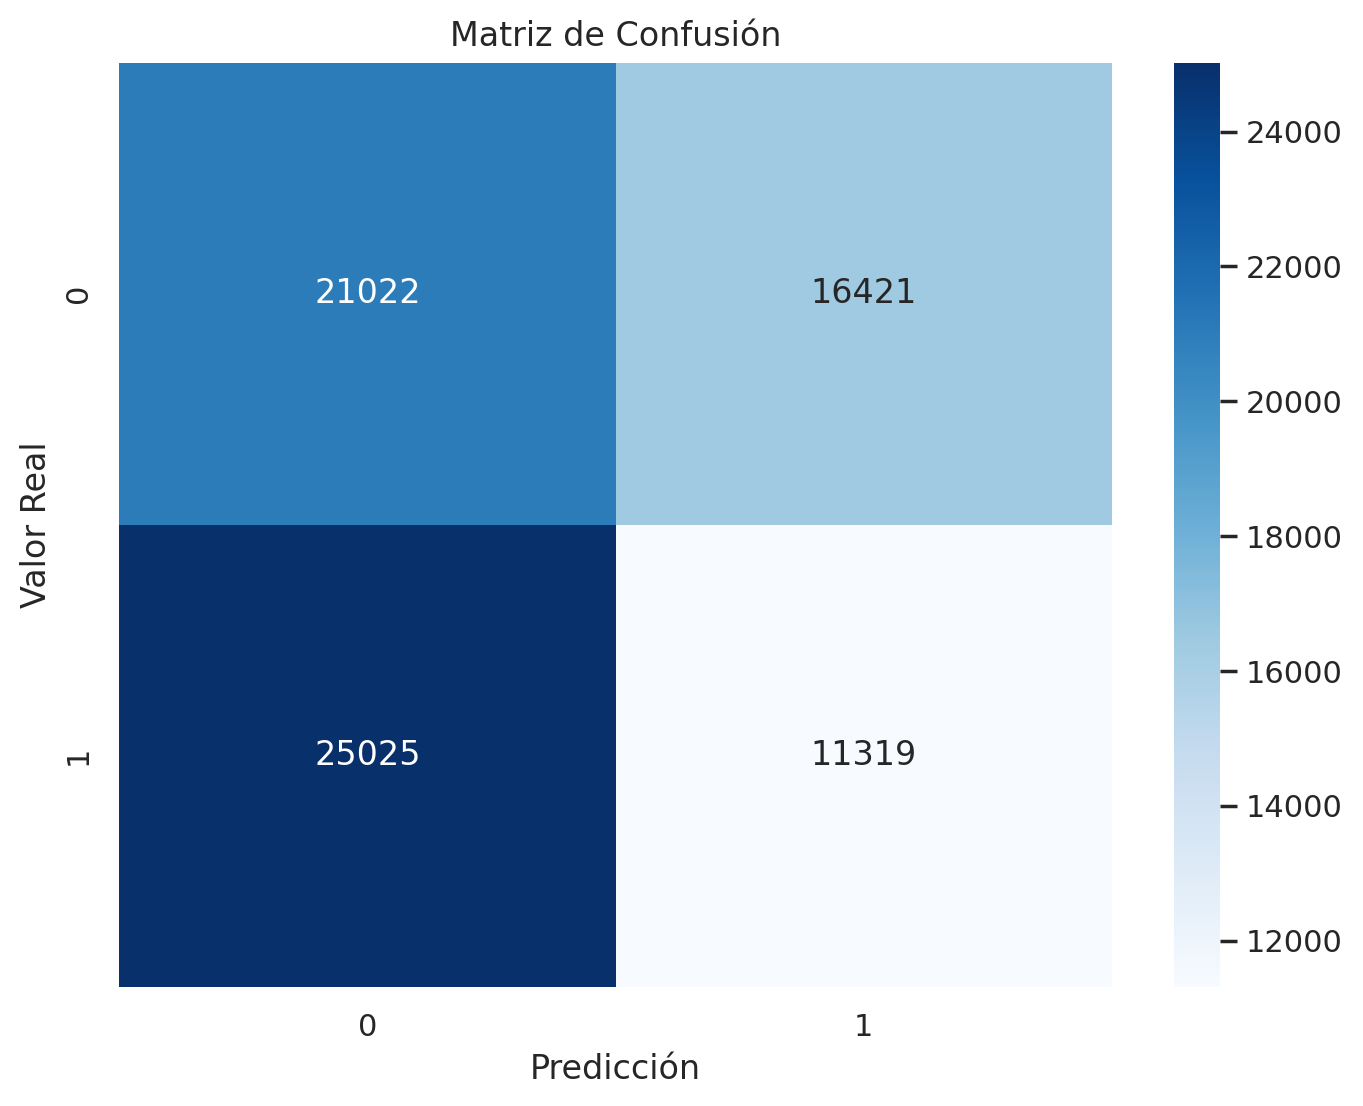

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura para la matriz de confusión
plt.figure(figsize=(8, 6))

# Crear una matriz de confusión usando el heatmap de Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])

# Etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar la gráfica
plt.show()

# Modelo Entrenado

In [ ]:
# import joblib
# import numpy as np

# # Cargar el modelo entrenado
# model_path = '/content/drive/MyDrive/Experimentación Python Tesis /Modelos ya entrenados/TWEETS_depresivos (RL-Word2Vec).pkl'
# loaded_model = joblib.load(model_path)

# # Texto de ejemplo para predecir
# new_tweet = "RT @chicasuicida876: Mis cicatrices son prueba de que estoy luchando con demonios que están tratando de matarme😓💔"

# # Preprocesamiento del texto (asumiendo que ya tienes las funciones definidas)
# new_tweet_cleaned = clean(removeHTML(new_tweet))
# new_tweet_extracted = extractTerms(new_tweet_cleaned)

# # Supongamos que 'modelW' es tu modelo Word2Vec entrenado previamente
# new_tweet_word2vec = document_vector(new_tweet_extracted, modelW)

# # Redimensionar new_tweet_word2vec a una matriz 2D
# new_tweet_word2vec = np.array([new_tweet_word2vec])

# # Hacer la predicción y obtener las probabilidades de ambas clases
# proba_prediction = loaded_model.predict_proba(new_tweet_word2vec)
# control_prob = proba_prediction[0][0]  # Probabilidad de ser control
# depresion_prob = proba_prediction[0][1]  # Probabilidad de ser depresión
# # Imprimir el resultado de la predicción
# print(new_tweet)
# print('------------------------------------------------------------------')
# if depresion_prob > control_prob:
#     print("Este tweet es de depresión")
#     print("Probabilidad de que el tweet sea de depresión: {:.2f}%".format(depresion_prob * 100))
# else:
#     print("Este tweet No es de depresión")
#     print("Probabilidad de que el tweet no sea de depresión: {:.2f}%".format(control_prob * 100))
